# Visualizing Envelope in Time Series Data

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.signal import hilbert
import numpy as np
from scipy import interpolate
import scipy.signal as sig
from scipy.fftpack import fft
from scipy import integrate
from sklearn.preprocessing import OneHotEncoder
import random

## Some inputs

In [3]:
fs = 24600     # sampling rate
fr = 10        # shaft speed
oc = 4.4       # fault charecteristic order
time_tot = 0.13        # signal time duration 
fn = 500            # natural frequency of the system 
decay_f = 2          # decay factor        

In [4]:
t = np.linspace(0, time_tot, num = int(fs*time_tot))
signal = np.zeros(len(t))    # initialize the signal value
t_fault = np.linspace(0, time_tot, num = int(oc*fr*time_tot))
for i in t_fault:
    signal += np.heaviside(t-i, 1.0)*np.exp(-1*decay_f*fs*(t-i)**2)   

## Plot raw signal and its spectrum

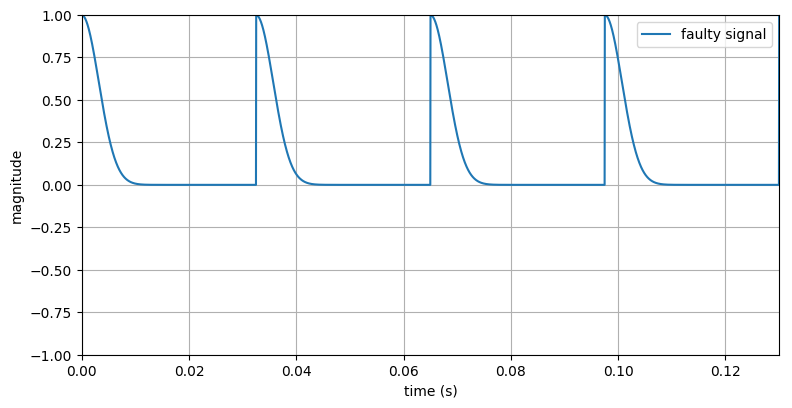

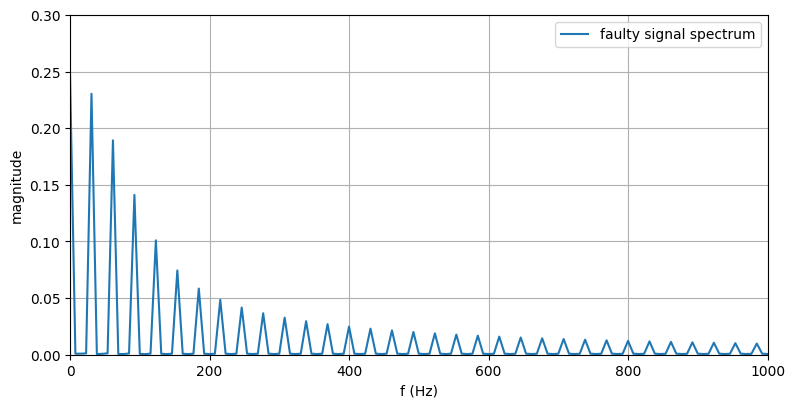

In [8]:
plt.figure(figsize = [9,4.5], dpi=100)
plt.plot(t, signal, label = 'faulty signal')
plt.xlim(0, time_tot)
plt.ylim(-1,1)
plt.xlabel('time (s)')
plt.ylabel('magnitude')
plt.legend(loc='upper right')
plt.grid(True)

### fft
f = np.linspace(0, fs/2, len(t)//2 + 1)
ps_signal = (2/len(t)) * np.abs(fft(signal)[:len(t)//2 + 1])
plt.figure(figsize = [9,4.5], dpi=100)
plt.plot(f, ps_signal, label = 'faulty signal spectrum')
plt.xlim(0, 1000)
plt.ylim(0,0.3)
plt.xlabel('f (Hz)')
plt.ylabel('magnitude')
plt.legend(loc='upper right')
plt.grid(True)






## Plot modulated signal and its spectrum

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "uwpper right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


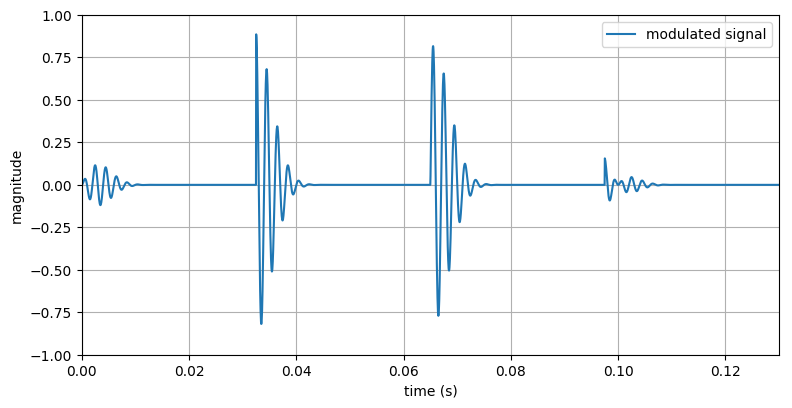

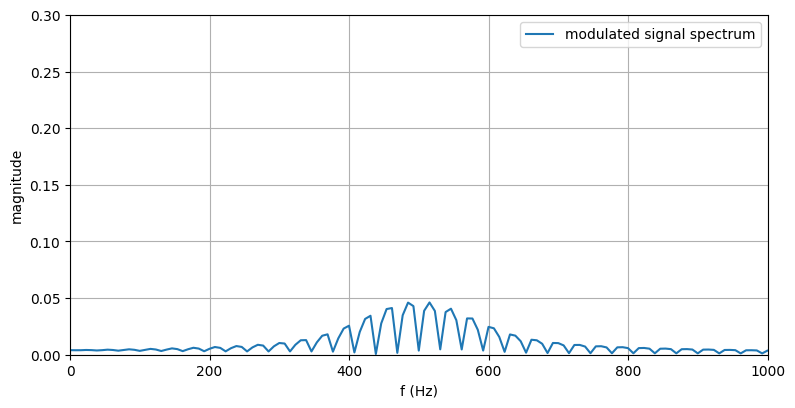

In [9]:
signal = signal * np.sin(2*np.pi*fn*t) * np.sin(2*np.pi*fr*t)
plt.figure(figsize = [9,4.5], dpi=100)
plt.plot(t, signal, label = 'modulated signal')
plt.xlim(0, time_tot)
plt.ylim(-1,1)
plt.xlabel('time (s)')
plt.ylabel('magnitude')
plt.legend(loc='uwpper right')
plt.grid(True)

### fft
f = np.linspace(0, fs/2, len(t)//2 + 1)
ps_signal = (2/len(t)) * np.abs(fft(signal)[:len(t)//2 + 1])
plt.figure(figsize = [9,4.5], dpi=100)
plt.plot(f, ps_signal, label = 'modulated signal spectrum')
plt.xlim(0, 1000)
plt.ylim(0,0.3)
plt.xlabel('f (Hz)')
plt.ylabel('magnitude')
plt.legend(loc='upper right')
plt.grid(True)


## Plot the Hilbert transform result

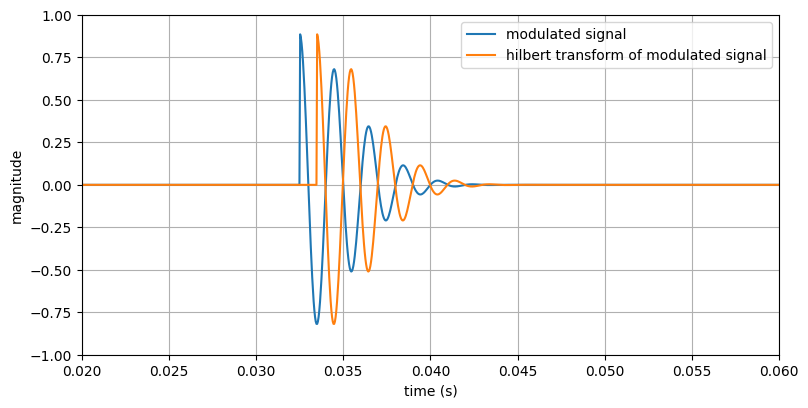

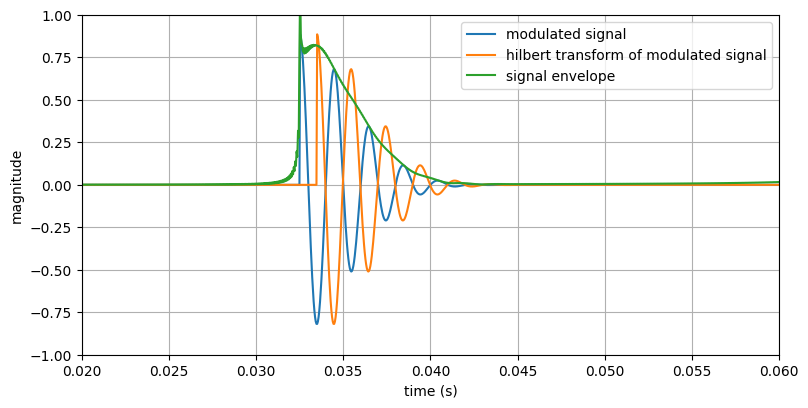

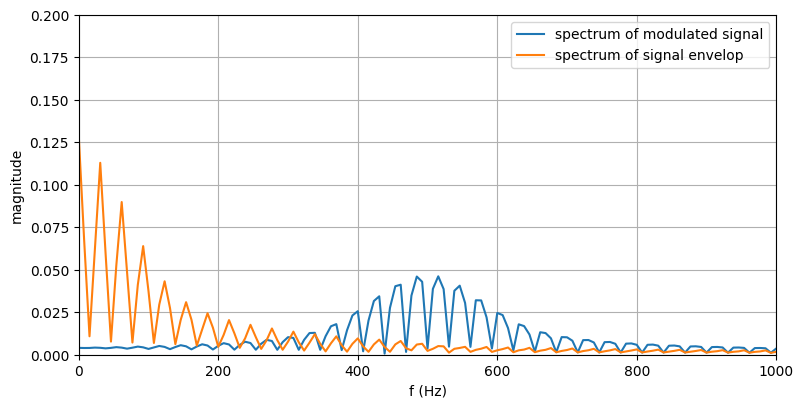

In [10]:
shifted_signal = signal.copy()
shift_s = int(0.5*fs/fn)
for i in range(shift_s, len(signal)):
    shifted_signal[i] = signal[i-shift_s]

    
    
plt.figure(figsize = [9,4.5], dpi=100)
plt.plot(t, signal, label = 'modulated signal')
plt.plot(t, shifted_signal, label = 'hilbert transform of modulated signal')
plt.xlim(0.02, 0.06)
plt.ylim(-1,1)
plt.xlabel('time (s)')
plt.ylabel('magnitude')
plt.legend(loc='upper right')
plt.grid(True)



# signal = signal * np.sin(2*np.pi*fn*t) * np.sin(2*np.pi*fr*t)
env_signal = np.abs(hilbert(signal))
plt.figure(figsize = [9,4.5], dpi=100)
plt.plot(t, signal, label = 'modulated signal')
plt.plot(t, shifted_signal, label = 'hilbert transform of modulated signal')
plt.plot(t, env_signal, label = 'signal envelope')
plt.xlim(0.02, 0.06)
plt.ylim(-1,1)
plt.xlabel('time (s)')
plt.ylabel('magnitude')
plt.legend(loc='upper right')
plt.grid(True)




### fft
f = np.linspace(0, fs/2, len(t)//2 + 1)
ps_env_signal = (2/len(t)) * np.abs(fft(env_signal)[:len(t)//2 + 1])
plt.figure(figsize = [9,4.5], dpi=100)
plt.plot(f, ps_signal, label = 'spectrum of modulated signal')
plt.plot(f, ps_env_signal, label = 'spectrum of signal envelop')

plt.xlim(0, 1000)
plt.ylim(0,0.2)
plt.xlabel('f (Hz)')
plt.ylabel('magnitude')
plt.legend(loc='upper right')
plt.grid(True)